<a href="https://colab.research.google.com/github/Roll1ngo/Authorization_and_authentication_synopsis/blob/master/Hw2_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частина третя: Аналіз датасет c Kaggle.com

In [ ]:
TABLE_NAME = 'bestsellers with categories.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
bsb_source = pd.read_csv(TABLE_NAME)
bsb = bsb_source.copy()
bsb.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
bsb.head(5)


,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
bsb

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
bsb.shape

(550, 7)

In [ ]:
bsb.drop_duplicates(subset='name', inplace=True)
bsb.shape

(351, 7)

Про скільки книг зберігає дані датасет?\
Відповідь: 351


In [ ]:
bsb.shape[0]

351

# Первинне дослідження даних



* Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)



In [ ]:
null_list = bsb.isnull().sum()

Чи є в якихось змінних пропуски? \
Відповідь: Hi

In [ ]:
null_list

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64



* Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)



In [ ]:
bsb['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [ ]:
bsb.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction




*  Які є унікальні жанри?\
   Відповідь: 'Non Fiction', 'Fiction'





* Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')



In [ ]:
bsb['price'].max()

105

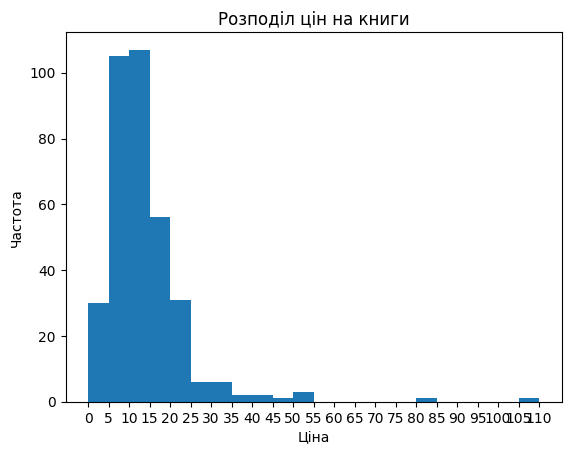

In [ ]:
bsb['price'].plot(kind='hist', bins=range(0, bsb['price'].max() + 10, 5), title='Розподіл цін на книги')
plt.xticks(range(0, bsb['price'].max() + 10, 5))
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)\
Відповідь: Максимальна ціна = 105\
Відповідь: Мінімальна ціна = 0\
Відповідь: Середня ціна = 13.07\
Відповідь: Медіанна ціна = 12.0

In [ ]:
bsb['price'].min()

0

In [ ]:
bsb['price'].max()

105

In [ ]:
bsb['price'].mean()

13.076923076923077

In [ ]:
bsb['price'].median()

12.0

# Пошук та сортування даних



*  Відповідь: Який рейтинг у датасеті найвищий?\
   Відповідь: 4.9



In [ ]:
bsb.head(2)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [ ]:
bsb['user_rating'].max()

4.9



* Відповідь: Скільки книг мають такий рейтинг?\
 Відповідь:28



In [ ]:
len(bsb[bsb['user_rating'] == bsb['user_rating'].max() ])


28



* Відповідь: Яка книга має найбільше відгуків?\
 Відповідь: 'Where the Crawdads Sing'



In [ ]:
bsb.loc[bsb['reviews'].idxmax()]['name']

'Where the Crawdads Sing'



* Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?\
 Відповідь: Go Set a Watchman: A Novel



In [ ]:
bsb_top_2015 = bsb[bsb['year'] == 2015]
top_book_2015 = bsb_top_2015.loc[bsb_top_2015['price'].idxmax()]
top_book_2015['name']

'Go Set a Watchman: A Novel'



* Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?\
 Відповідь: 40




In [ ]:
len(top_2010 = bsb[bsb['year'] == 2010])

40



* Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?\
 Відповідь: 1



In [ ]:
rat_v1 = bsb[(bsb['user_rating'] == 4.9) & ((bsb['year'] == 2010) | (bsb['year'] == 2011))]
rat_v2= bsb[(bsb['user_rating'] == 4.9) & bsb['year'].isin([2010, 2011])]
len(rat_v1)

1

In [ ]:
len(rat_v2)

1



* І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).


In [ ]:
top_2015_sort_price = bsb_top_2015[bsb_top_2015['price']< 8].sort_values('price')
top_2015_sort_price

,name,author,user_rating,reviews,price,year,genre
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction




* Яка книга остання у відсортованому списку?\
 Відповідь: Old School (Diary of a Wimpy Kid #10)



In [ ]:
top_2015_sort_price.tail(1)['name']

253    Old School (Diary of a Wimpy Kid #10)
Name: name, dtype: object

# Агрегування даних та з'єднання таблиць